In [51]:
import tensorflow as tf
from keras.models import load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pickle
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

# Model 1

In [57]:
model = 'model1.hdf5'
data = 'good_data.pickle'
runs = [304125,302263,300157]
savefile = 'BestModel1.hdf5'

plot = False

epochs = 200

autoencoder = load_model(filepath=model)
    
with open(data, 'rb') as handle:
    data1 = pickle.load(handle)

Xtrain1 = np.array(data1[str(runs[0])]['sample'])
Xval1 = np.array(data1[str(runs[1])]['sample'])
Xtest1 = np.array(data1[str(runs[2])]['sample'])

checkpointer = ModelCheckpoint(filepath=savefile, verbose=0, save_best_only=True)
earlystop= EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto')

history = autoencoder.fit(Xtrain1,Xtrain1,epochs=epochs,batch_size=100
                             ,verbose=2
                             ,validation_data=(Xval1,Xval1)
                             ,shuffle=True
                             ,callbacks=[checkpointer,earlystop])

Train on 1039 samples, validate on 1043 samples
Epoch 1/200
 - 1s - loss: 0.6940 - val_loss: 0.6935
Epoch 2/200
 - 0s - loss: 0.6931 - val_loss: 0.6924
Epoch 3/200
 - 0s - loss: 0.6924 - val_loss: 0.6916
Epoch 4/200
 - 0s - loss: 0.6919 - val_loss: 0.6909
Epoch 5/200
 - 0s - loss: 0.6915 - val_loss: 0.6904
Epoch 6/200
 - 0s - loss: 0.6911 - val_loss: 0.6898
Epoch 7/200
 - 0s - loss: 0.6907 - val_loss: 0.6893
Epoch 8/200
 - 0s - loss: 0.6904 - val_loss: 0.6887
Epoch 9/200
 - 0s - loss: 0.6900 - val_loss: 0.6882
Epoch 10/200
 - 0s - loss: 0.6897 - val_loss: 0.6877
Epoch 11/200
 - 0s - loss: 0.6893 - val_loss: 0.6872
Epoch 12/200
 - 0s - loss: 0.6890 - val_loss: 0.6867
Epoch 13/200
 - 0s - loss: 0.6887 - val_loss: 0.6862
Epoch 14/200
 - 0s - loss: 0.6883 - val_loss: 0.6858
Epoch 15/200
 - 0s - loss: 0.6880 - val_loss: 0.6853
Epoch 16/200
 - 0s - loss: 0.6877 - val_loss: 0.6848
Epoch 17/200
 - 0s - loss: 0.6874 - val_loss: 0.6844
Epoch 18/200
 - 0s - loss: 0.6871 - val_loss: 0.6839
Epoch 1

Epoch 154/200
 - 0s - loss: 0.6753 - val_loss: 0.6649
Epoch 155/200
 - 0s - loss: 0.6753 - val_loss: 0.6649
Epoch 156/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 157/200
 - 0s - loss: 0.6753 - val_loss: 0.6649
Epoch 158/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 159/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 160/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 161/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 162/200
 - 0s - loss: 0.6753 - val_loss: 0.6649
Epoch 163/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 164/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 165/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 166/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 167/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 168/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 169/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 170/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 171/200
 - 0s - loss: 0.6753 - val_loss: 0.6648
Epoch 172/200
 - 0s - loss: 

KeyError: 'acc'

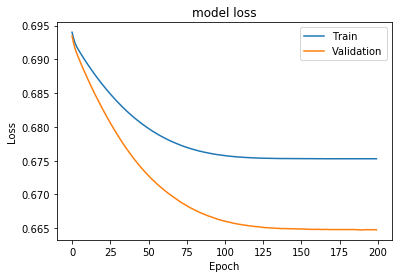

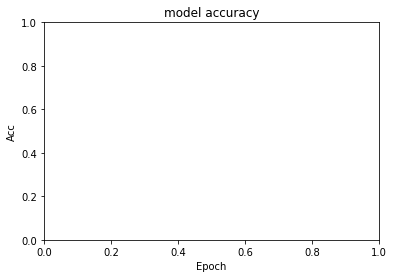

In [58]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("model loss")
plt.plot(history.history["loss"])#, linestyle=line_styles[0], color=color_palette["Indigo"][900], linewidth=3)
plt.plot(history.history["val_loss"])#, linestyle=line_styles[2], color=color_palette["Teal"][300], linewidth=3)
plt.legend(["Train", "Validation"])#, loc="upper right", frameon=False)
plt.yscale("linear")

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("model accuracy")
plt.plot(history.history["acc"])#, linestyle=line_styles[0], color=color_palette["Indigo"][900], linewidth=3)
plt.plot(history.history["val_acc"])#, linestyle=line_styles[2], color=color_palette["Teal"][300], linewidth=3)
plt.legend(["Train", "Validation"])#, loc="upper right", frameon=False)
plt.yscale("linear")

plt.show()

In [59]:
model1 = load_model('BestModel1.hdf5',compile=False)
pred1 = model1.predict(Xtest1)
error = abs(Xtest1-pred1)/Xtest1

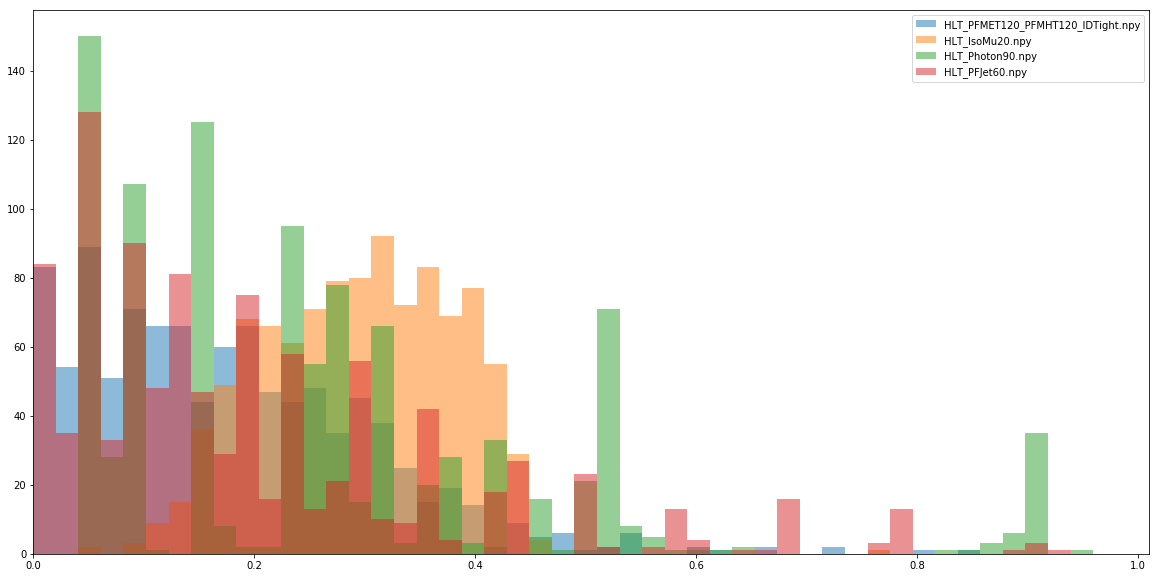

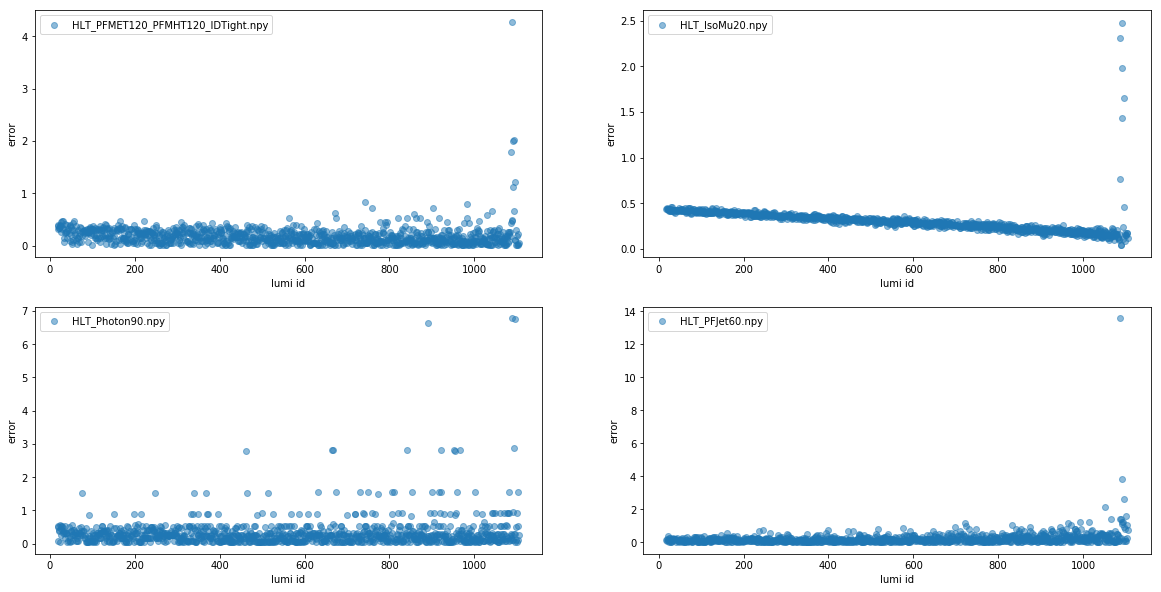

In [60]:
err1 = [[],[],[],[]]
for i in range(len(error)):
    for j in range(len(error[i])):
        err1[j].append(error[i][j])
        
labels = np.array(data1['HLT'])
bins = np.linspace(0,1,50)

plt.figure(figsize=[20,10])
for i in range(0,4):
    bins = np.linspace(0,1,num=50)
    plt.hist(err1[i],bins=bins,label=labels[i],alpha=.5)
    
plt.xlim(0,1.01)
plt.legend()

lumi1 = data1[str(runs[2])]['lumiid'] 

plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.scatter(lumi1,err1[i],label=labels[i],alpha=.5)
    plt.xlabel('lumi id')
    plt.ylabel('error')
    plt.legend()    

plt.show()

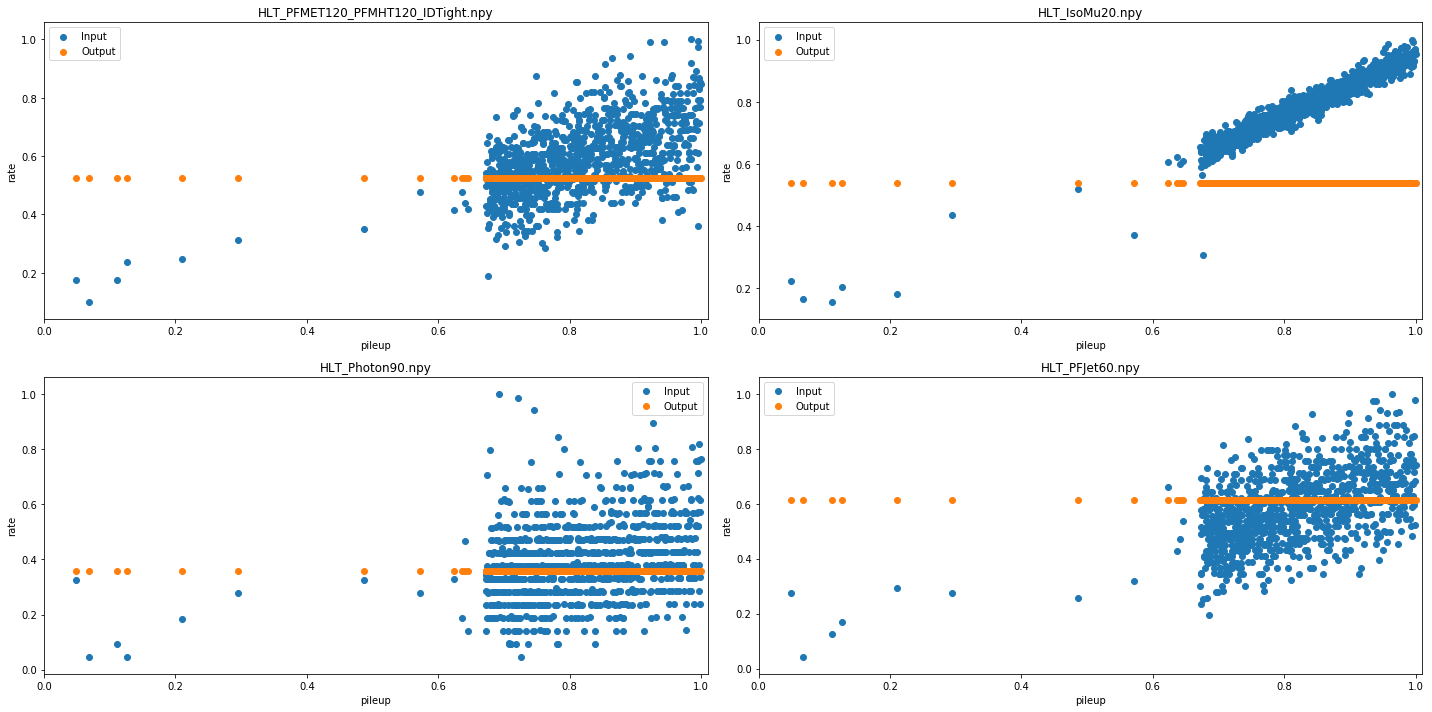

In [61]:
xt = [[],[],[],[]]
p1 = [[],[],[],[]]
for i in range(len(Xtest1)):
    for j in range(len(Xtest1[i])):
        xt[j].append(Xtest1[i][j])
        p1[j].append(pred1[i][j])
        
labels = np.array(data1['HLT'])
stuff = np.array(data1[str(runs[2])]['sample_pileup'])
pileup = []
for i in range(0,len(stuff)):
    pileup.append(stuff[i][0])
    

plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.scatter(pileup,xt[i],label='Input')
    plt.scatter(pileup,p1[i],label='Output')
    plt.xlim(0,1.01)
    plt.xlabel('pileup')
    plt.ylabel('rate')
    plt.title(labels[i])
    plt.legend()
    
plt.tight_layout()
plt.show()

# Model 2

In [41]:
model = 'model1Pileup.hdf5'
data = 'good_data.pickle'
runs = [304125,302263,300157]
savefile = 'BestModel1Pileup.hdf5'

plot = False

epochs = 200

autoencoder = load_model(filepath=model)
    
with open(data, 'rb') as handle:
    data2 = pickle.load(handle)

Xtrain2 = np.array(data1[str(runs[0])]['sample_pileup'])
Xval2 = np.array(data1[str(runs[1])]['sample_pileup'])
Xtest2 = np.array(data1[str(runs[2])]['sample_pileup'])

checkpointer = ModelCheckpoint(filepath=savefile, verbose=0, save_best_only=True)
earlystop= EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto')

history = autoencoder.fit(Xtrain2,Xtrain2,epochs=epochs,batch_size=100
                             ,verbose=2
                             ,validation_data=(Xval2,Xval2)
                             ,shuffle=True
                             ,callbacks=[checkpointer,earlystop])

Train on 1039 samples, validate on 1043 samples
Epoch 1/200
 - 2s - loss: 0.2759 - acc: 0.0183 - val_loss: 0.3040 - val_acc: 0.0134
Epoch 2/200
 - 0s - loss: 0.2620 - acc: 0.0183 - val_loss: 0.2899 - val_acc: 0.0134
Epoch 3/200
 - 0s - loss: 0.2484 - acc: 0.0183 - val_loss: 0.2764 - val_acc: 0.0134
Epoch 4/200
 - 0s - loss: 0.2352 - acc: 0.0183 - val_loss: 0.2636 - val_acc: 0.0134
Epoch 5/200
 - 0s - loss: 0.2229 - acc: 0.0183 - val_loss: 0.2519 - val_acc: 0.0134
Epoch 6/200
 - 0s - loss: 0.2120 - acc: 0.0183 - val_loss: 0.2423 - val_acc: 0.0134
Epoch 7/200
 - 0s - loss: 0.2038 - acc: 0.0183 - val_loss: 0.2361 - val_acc: 0.0134
Epoch 8/200
 - 0s - loss: 0.1988 - acc: 0.0183 - val_loss: 0.2328 - val_acc: 0.0134
Epoch 9/200
 - 0s - loss: 0.1964 - acc: 0.0183 - val_loss: 0.2312 - val_acc: 0.0134
Epoch 10/200
 - 0s - loss: 0.1952 - acc: 0.0183 - val_loss: 0.2303 - val_acc: 0.0134
Epoch 11/200
 - 0s - loss: 0.1946 - acc: 0.0183 - val_loss: 0.2297 - val_acc: 0.0134
Epoch 12/200
 - 0s - loss:

Epoch 97/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 98/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 99/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 100/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 101/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 102/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 103/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2271 - val_acc: 0.0134
Epoch 104/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2270 - val_acc: 0.0134
Epoch 105/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2270 - val_acc: 0.0134
Epoch 106/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2270 - val_acc: 0.0134
Epoch 107/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_loss: 0.2270 - val_acc: 0.0134
Epoch 108/200
 - 0s - loss: 0.1920 - acc: 0.0183 - val_lo

Epoch 193/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 194/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 195/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 196/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 197/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 198/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 199/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2268 - val_acc: 0.0134
Epoch 200/200
 - 0s - loss: 0.1917 - acc: 0.0183 - val_loss: 0.2269 - val_acc: 0.0134


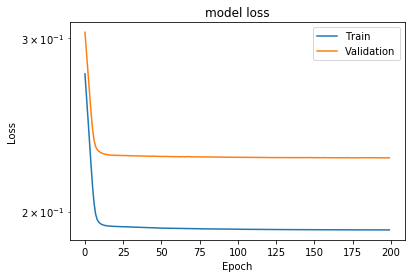

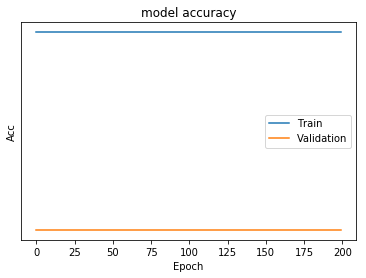

In [42]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("model loss")
plt.plot(history.history["loss"])#, linestyle=line_styles[0], color=color_palette["Indigo"][900], linewidth=3)
plt.plot(history.history["val_loss"])#, linestyle=line_styles[2], color=color_palette["Teal"][300], linewidth=3)
plt.legend(["Train", "Validation"])#, loc="upper right", frameon=False)
plt.yscale("log")

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("model accuracy")
plt.plot(history.history["acc"])#, linestyle=line_styles[0], color=color_palette["Indigo"][900], linewidth=3)
plt.plot(history.history["val_acc"])#, linestyle=line_styles[2], color=color_palette["Teal"][300], linewidth=3)
plt.legend(["Train", "Validation"])#, loc="upper right", frameon=False)
plt.yscale("log")

plt.show()

In [43]:
model2 = load_model('BestModel1Pileup.hdf5',compile=False)
pred2 = model2.predict(Xtest2)
error2 = abs(Xtest2-pred2)/Xtest2

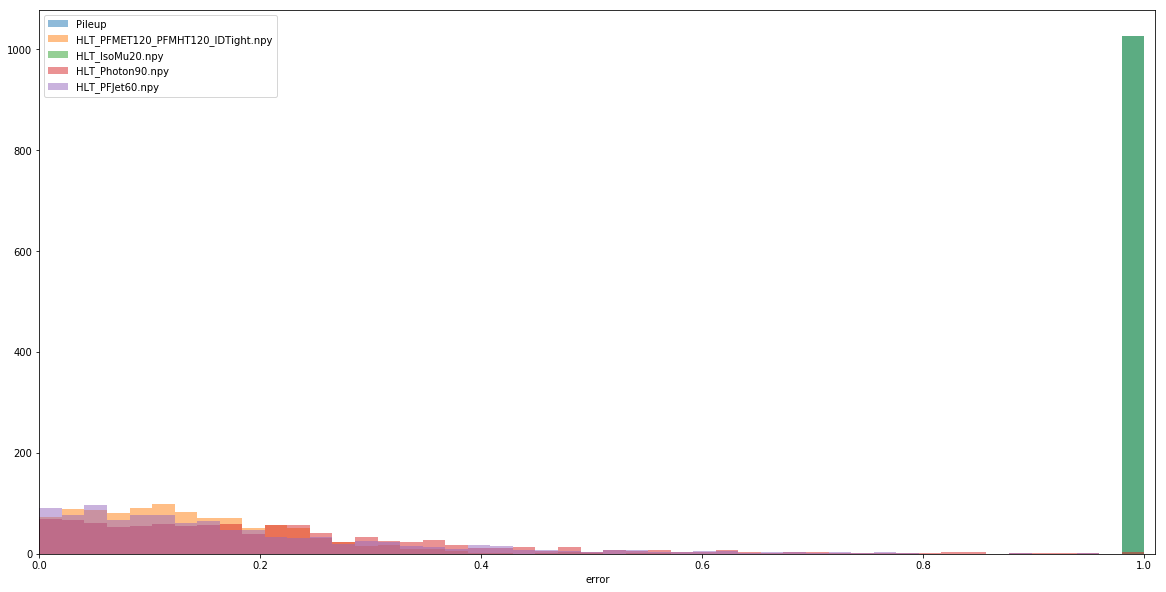

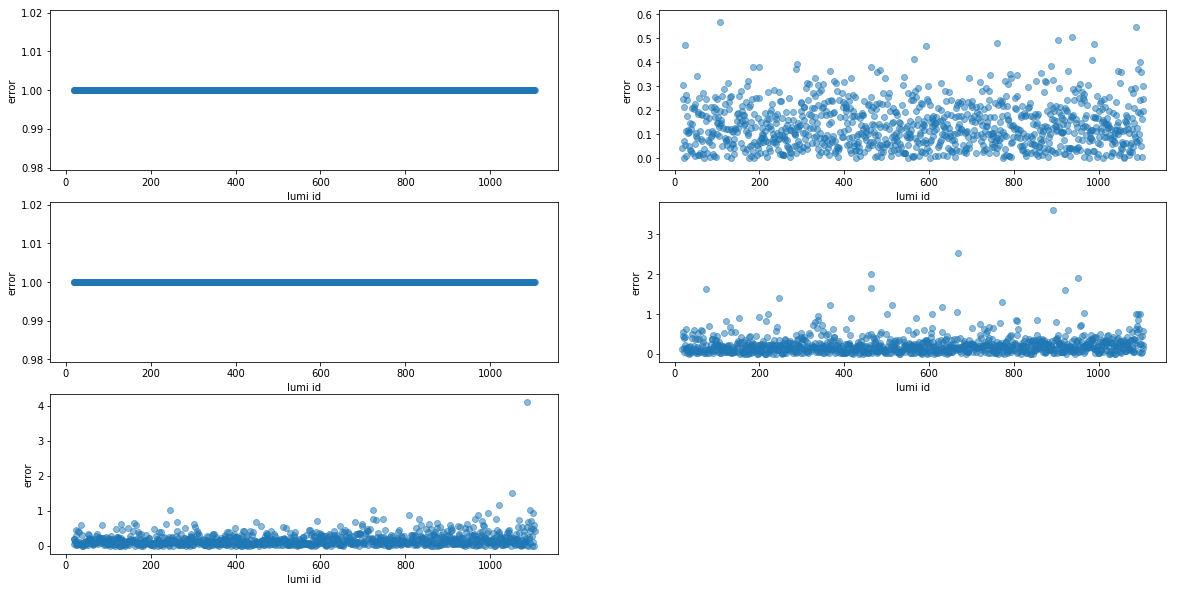

In [44]:
err2 = [[],[],[],[],[]]
for i in range(len(error2)):
    for j in range(len(error2[i])):
        err2[j].append(error2[i][j])
        
labels = ['Pileup'] + data2['HLT'] 
lumi2 = data2[str(runs[2])]['lumiid'] 

plt.figure(figsize=[20,10])
for i in range(0,5):
    bins = np.linspace(0,1,num=50)
    plt.hist(err2[i],bins=bins,label=labels[i],alpha=.5)
plt.xlabel('error')
plt.xlim(0,1.01)
plt.legend()

plt.figure(figsize=[20,10])
for i in range(0,5):
    plt.subplot(3,2,i+1)
    plt.scatter(lumi2,err2[i],label=labels[i],alpha=.5)
    plt.xlabel('lumi id')
    plt.ylabel('error')

plt.show()

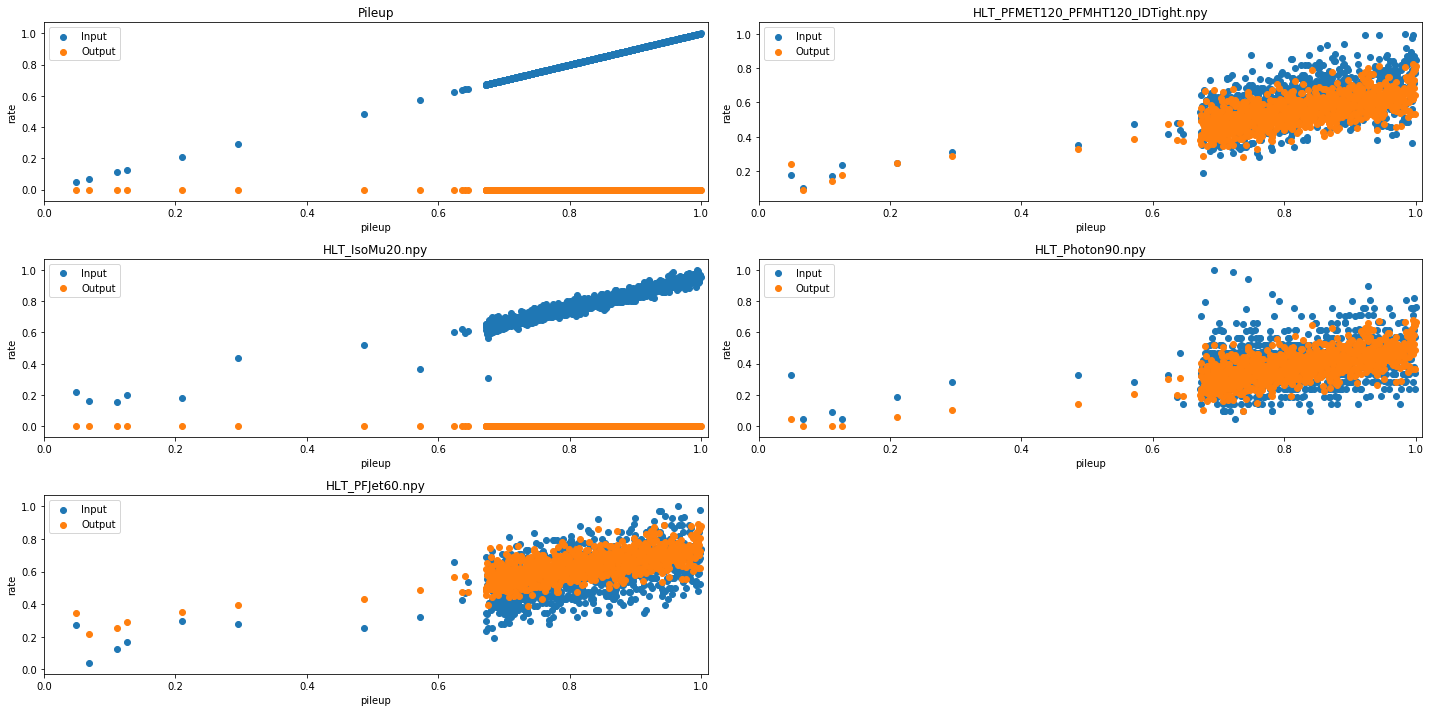

In [45]:
xt2 = [[],[],[],[],[]]
p2 = [[],[],[],[],[]]
Xtest2 = np.array(data1[str(runs[2])]['sample_pileup'])

for i in range(len(Xtest2)):
    for j in range(len(Xtest2[i])):
        xt2[j].append(Xtest2[i][j])
        p2[j].append(pred2[i][j])
        
stuff = np.array(data2[str(runs[2])]['sample_pileup'])
pileup = []
for i in range(0,len(stuff)):
    pileup.append(stuff[i][0])

plt.figure(figsize=[20,10])
for i in range(0,5):
    plt.subplot(3,2,i+1)
    plt.scatter(pileup,xt2[i],label='Input')
    plt.scatter(pileup,p2[i],label='Output')
    plt.xlim(0,1.01)
    plt.xlabel('pileup')
    plt.ylabel('rate')
    plt.title(labels[i])
    plt.legend()
    
plt.tight_layout()
plt.show()

# Bad Runs

In [46]:
badruns = [301480,299592]

with open('bad_data.pickle', 'rb') as handle:
    dataB = pickle.load(handle)

BadTest1 = np.array(dataB[str(badruns[0])]['sample'])
BadTest2 = np.array(dataB[str(badruns[0])]['sample_pileup'])

BadTest12 = np.array(dataB[str(badruns[1])]['sample'])
BadTest22 = np.array(dataB[str(badruns[1])]['sample_pileup'])

In [47]:
pred1B = model1.predict(BadTest1)
pred2B = model2.predict(BadTest2)

error1B = abs(BadTest1-pred1B)/BadTest1
error2B = abs(BadTest2-pred2B)/BadTest2

pred1B2 = model1.predict(BadTest12)
pred2B2 = model2.predict(BadTest22)

error1B2 = abs(BadTest12-pred1B2)/BadTest12
error2B2 = abs(BadTest22-pred2B2)/BadTest22

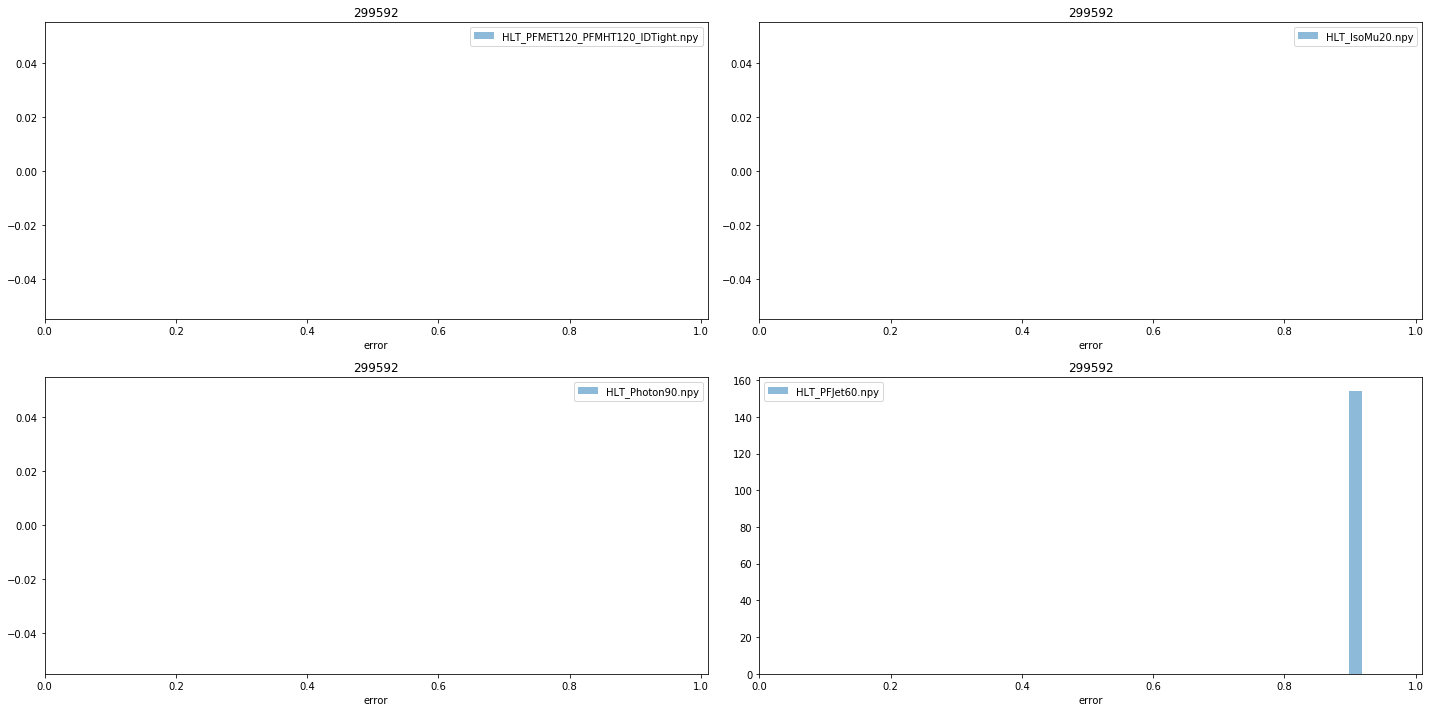

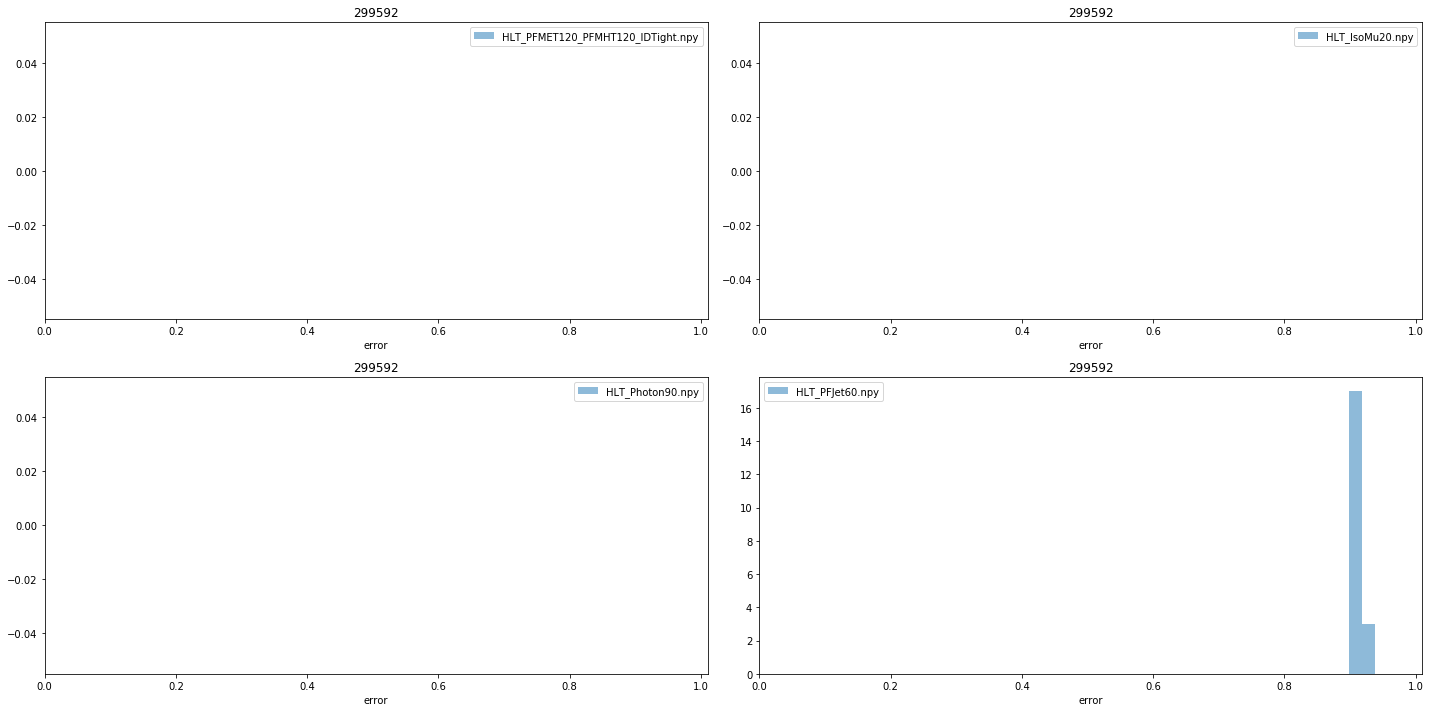

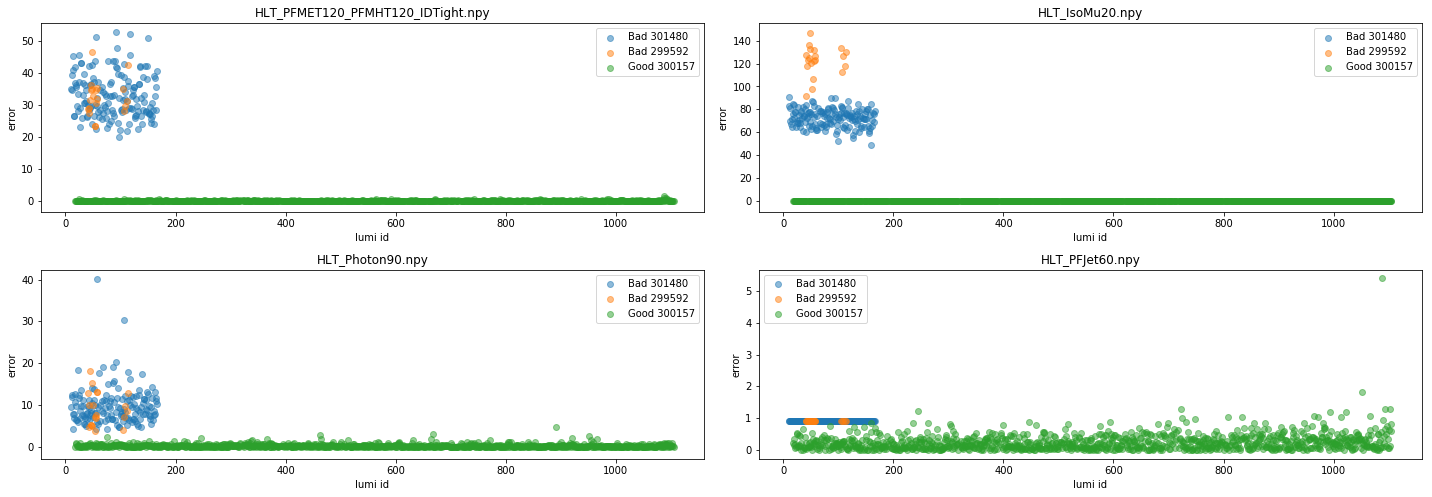

In [48]:
err1B = [[],[],[],[]]
err1B2 = [[],[],[],[]]

for i in range(len(error1B)):
    for j in range(len(error1B[i])):
        err1B[j].append(error1B[i][j])
for i in range(len(error1B2)):
    for j in range(len(error1B2[i])):          
        err1B2[j].append(error1B2[i][j])
        
labels = ['Pileup'] + dataB['HLT'] 
lumi1B = dataB[str(badruns[0])]['lumiid'] 
lumi1B2 = dataB[str(badruns[1])]['lumiid'] 


plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(2,2,i+1)
    bins = np.linspace(0,1,num=50)
    plt.hist(err1B[i],bins=bins,label=labels[i+1],alpha=.5)
    plt.xlabel('error')
    plt.xlim(0,1.01)
    plt.title(str(badruns[1]))
    plt.legend()
plt.tight_layout()

plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(2,2,i+1)
    bins = np.linspace(0,1,num=50)
    plt.hist(err1B2[i],bins=bins,label=labels[i+1],alpha=.5)
    plt.xlabel('error')
    plt.xlim(0,1.01)
    plt.title(str(badruns[1]))
    plt.legend()
    
plt.tight_layout()

plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(3,2,i+1)
    plt.scatter(lumi1B,err1B[i],label="Bad " + str(badruns[0]),alpha=.5)
    plt.scatter(lumi1B2,err1B2[i],label="Bad "+ str(badruns[1]),alpha=.5)
    plt.scatter(lumi1,err1[i],label='Good '+str(runs[2]),alpha=.5)
    plt.xlabel('lumi id')
    plt.ylabel('error')
    plt.title(labels[i+1])
    plt.legend()

plt.tight_layout()
plt.show()

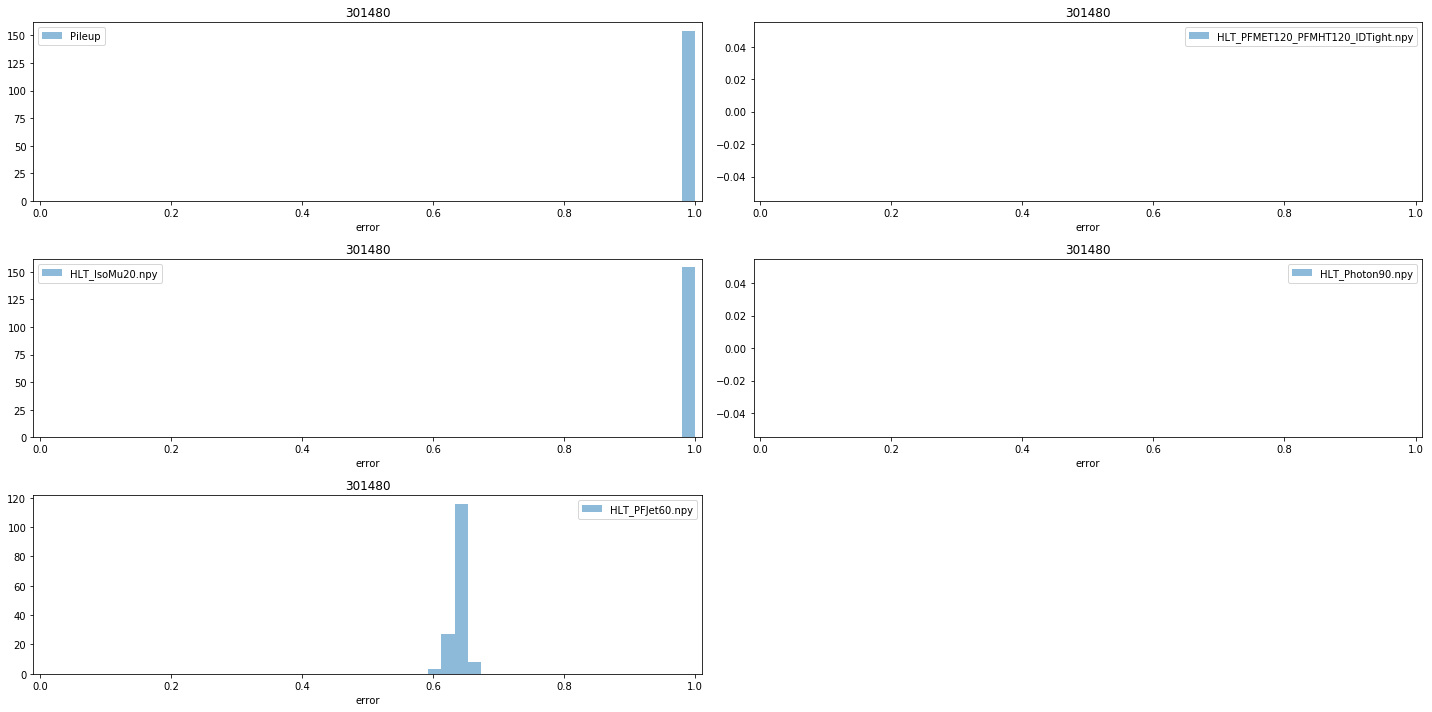

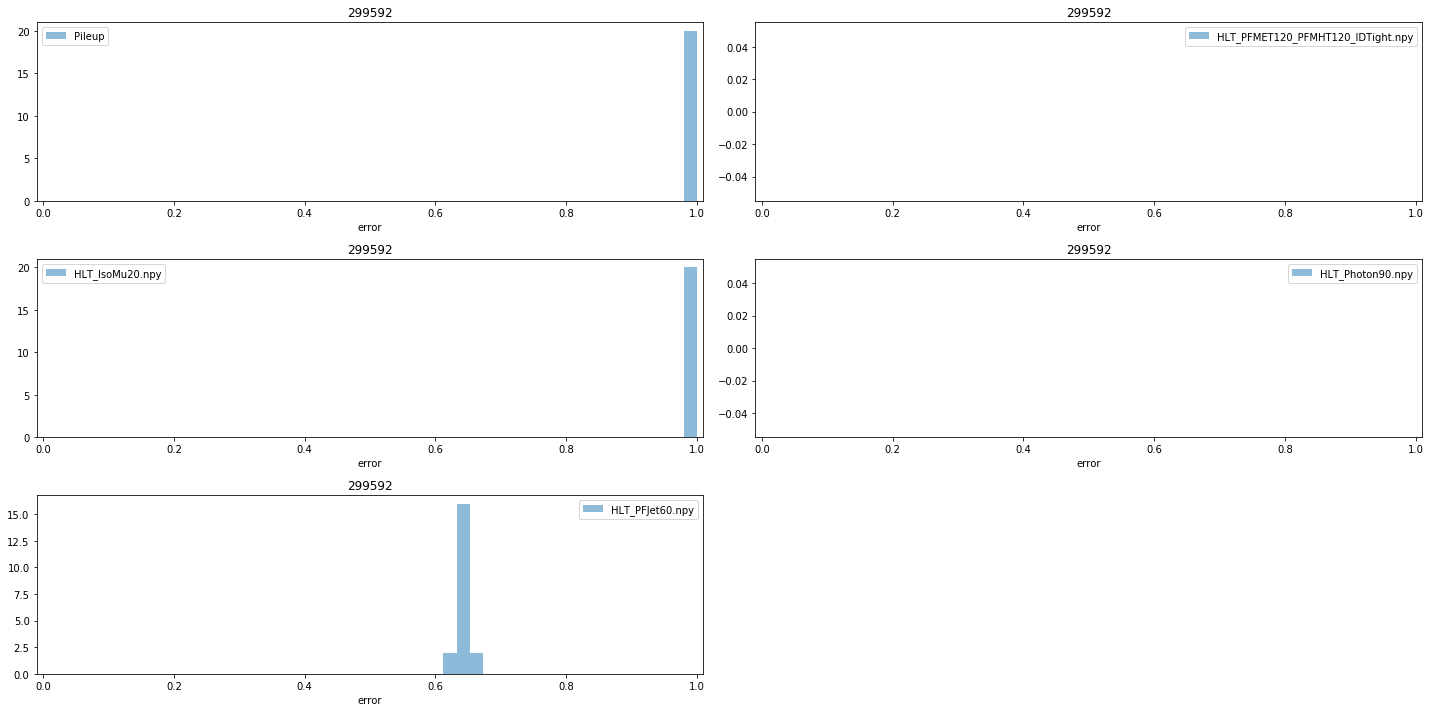

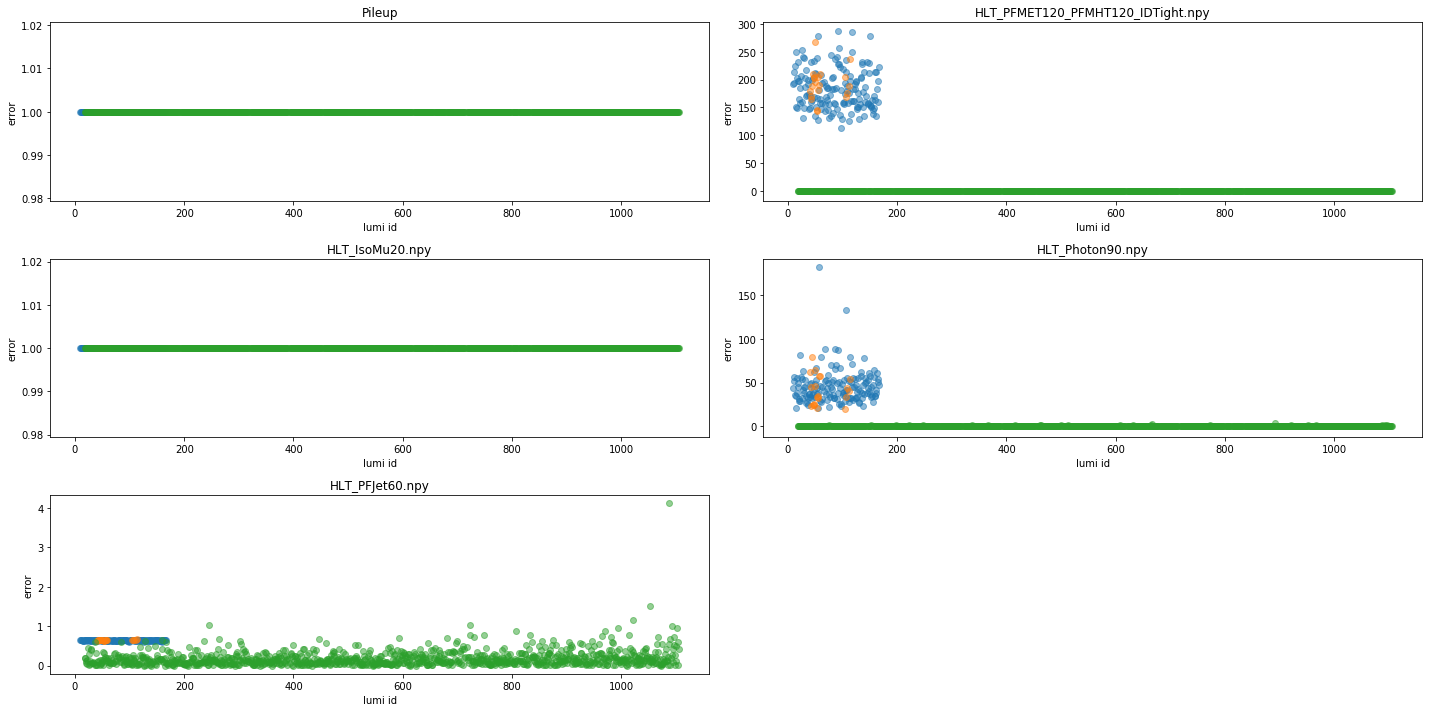

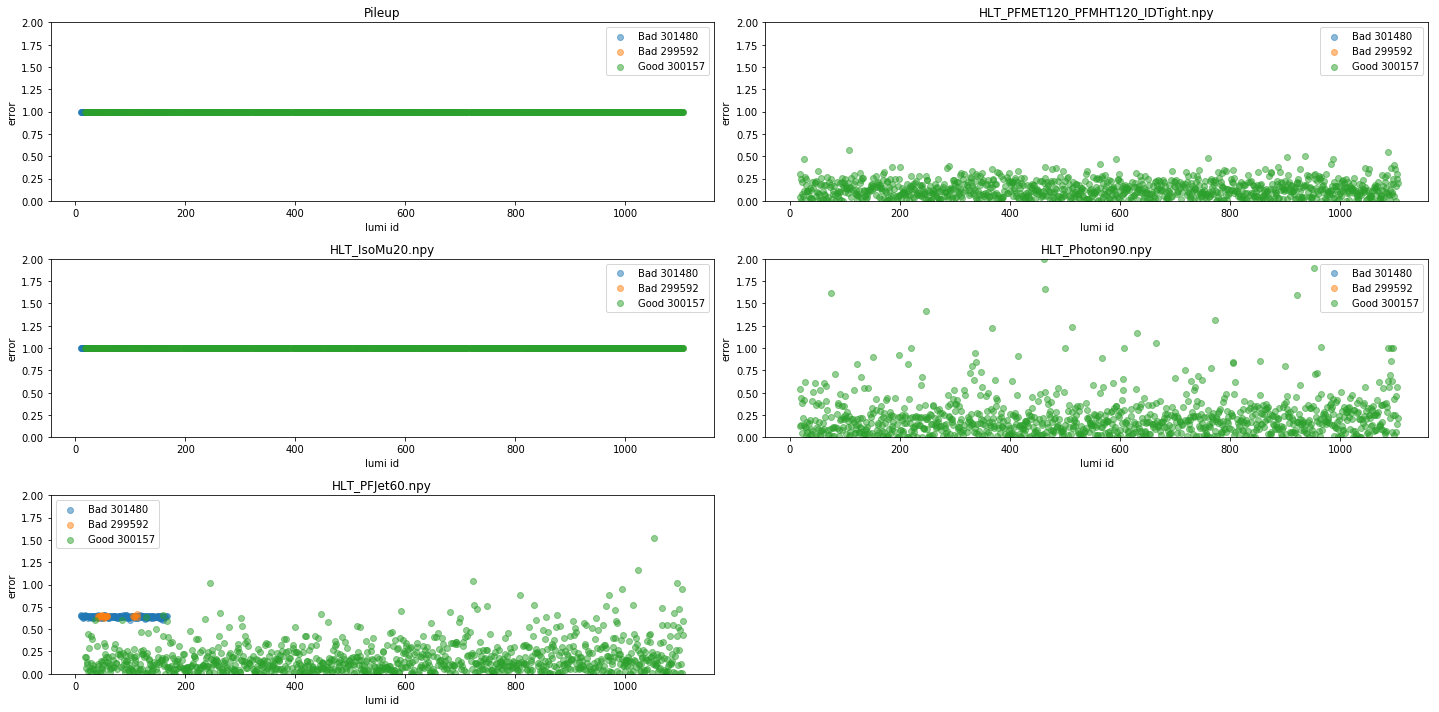

In [49]:
err2B = [[],[],[],[],[]]
for i in range(len(error2B)):
    for j in range(len(error2B[i])):
        err2B[j].append(error2B[i][j])
        
err2B2 = [[],[],[],[],[]]
for i in range(len(error2B2)):
    for j in range(len(error2B2[i])):
        err2B2[j].append(error2B2[i][j])
        
labels = ['Pileup'] + dataB['HLT'] 
lumi2B = dataB[str(badruns[0])]['lumiid'] 
lumi2B2 = dataB[str(badruns[1])]['lumiid'] 

plt.figure(figsize=[20,10])
for i in range(0,5):
    plt.subplot(3,2,i+1)
    bins = np.linspace(0,1,num=50)
    plt.hist(err2B[i],bins=bins,label=labels[i],alpha=.5)
    plt.xlabel('error')
    plt.xlim(-.01,1.01)
    plt.title(str(badruns[0]))
    plt.legend()
    
plt.tight_layout()

plt.figure(figsize=[20,10])
for i in range(0,5):
    plt.subplot(3,2,i+1)
    bins = np.linspace(0,1,num=50)
    plt.hist(err2B2[i],bins=bins,label=labels[i],alpha=.5)
    plt.xlabel('error')
    plt.title(str(badruns[1]))
    plt.xlim(-.01,1.01)
    plt.legend()
plt.tight_layout()

plt.figure(figsize=[20,10])
for i in range(0,5):
    plt.subplot(3,2,i+1)
    plt.scatter(lumi2B,err2B[i],label='Bad '+str(badruns[0]),alpha=.5)
    plt.scatter(lumi2B2,err2B2[i],label='Bad '+str(badruns[1]),alpha=.5)
    plt.scatter(lumi2,err2[i],label='Good '+str(runs[2]),alpha=.5)
    plt.xlabel('lumi id')
    plt.title(labels[i])
    plt.ylabel('error')

plt.tight_layout()

plt.figure(figsize=[20,10])
for i in range(0,5):
    plt.subplot(3,2,i+1)
    plt.scatter(lumi2B,err2B[i],label='Bad '+str(badruns[0]),alpha=.5)
    plt.scatter(lumi2B2,err2B2[i],label='Bad '+str(badruns[1]),alpha=.5)
    plt.scatter(lumi2,err2[i],label='Good '+str(runs[2]),alpha=.5)
    plt.xlabel('lumi id')
    plt.title(labels[i])
    plt.ylim(0,2)
    plt.ylabel('error')
    plt.legend()

plt.tight_layout()

plt.show()

# 2 Good Runs

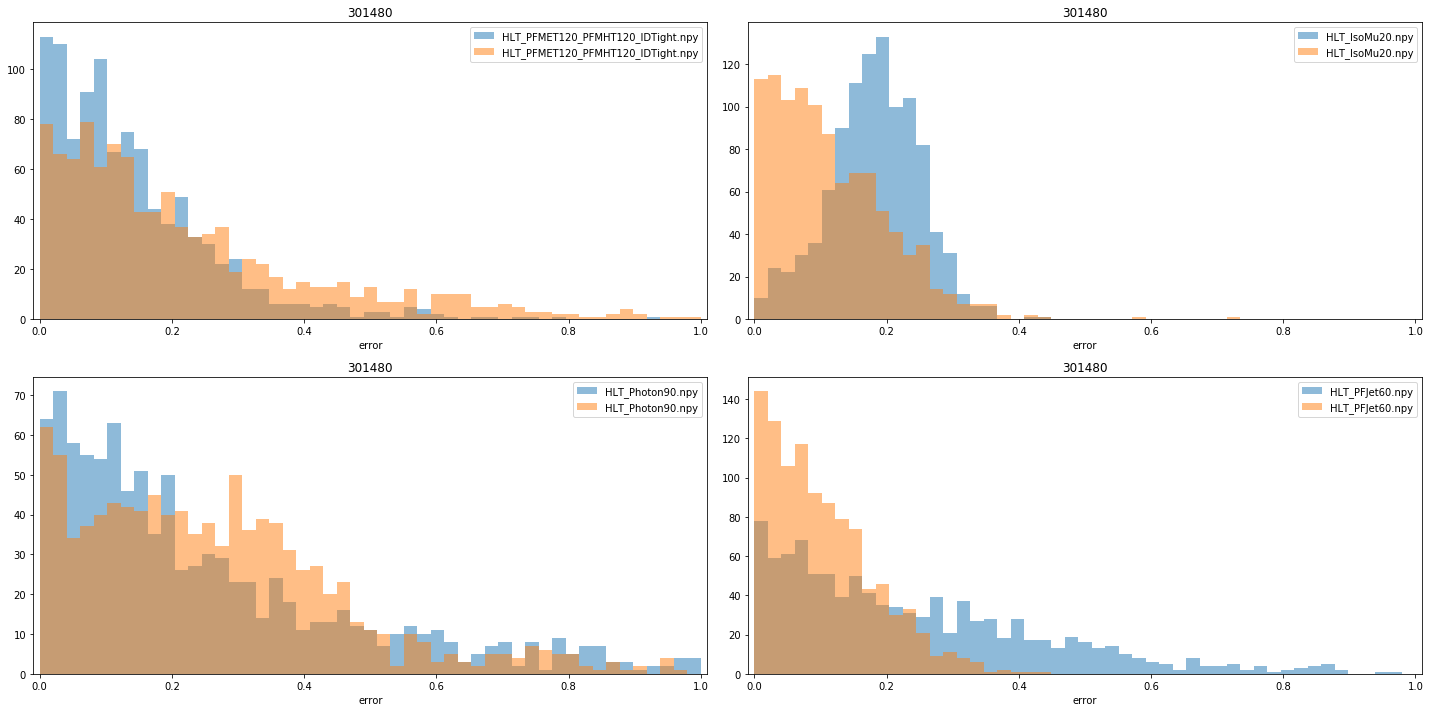

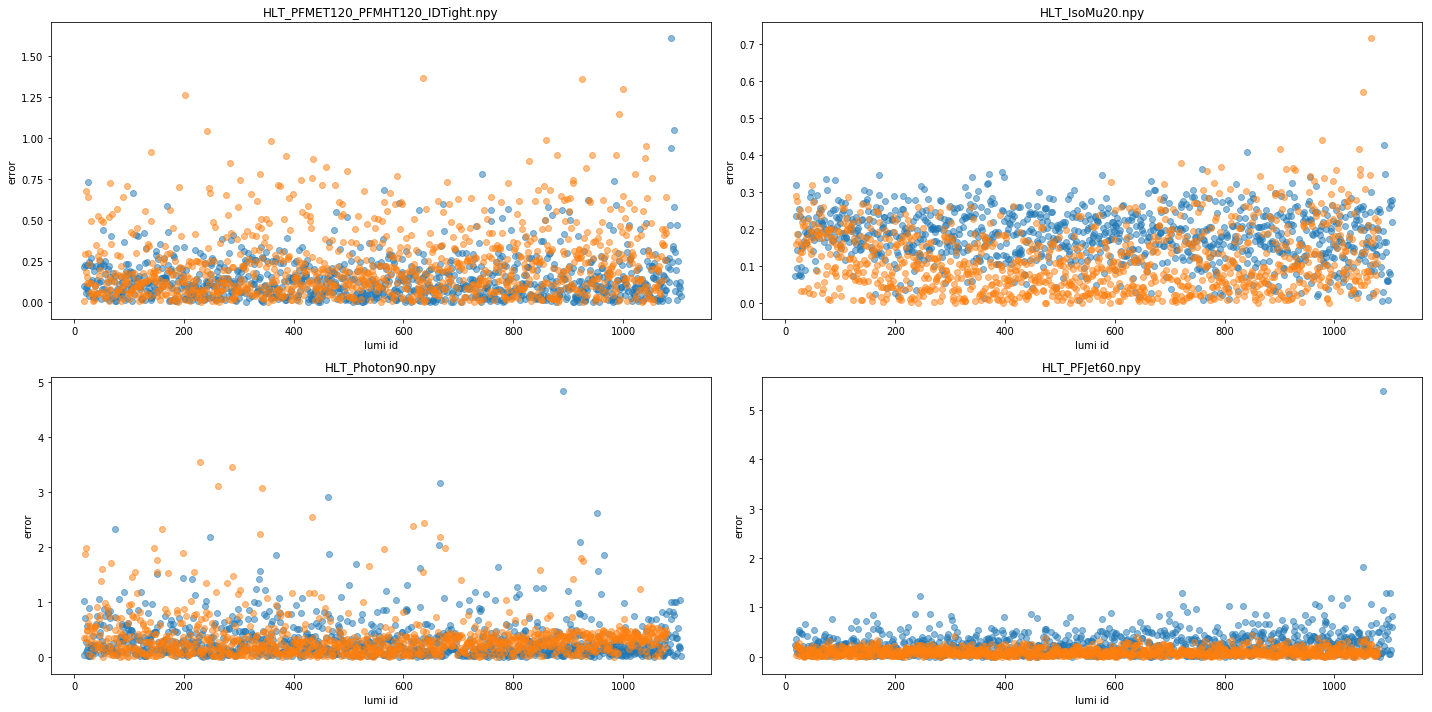

In [50]:
Xtest2 = np.array(data1['304508']['sample'])

pred12 = model1.predict(Xtest2)
error12 = abs(Xtest2-pred12)/Xtest2

err12 = [[],[],[],[]]
for i in range(len(error12)):
    for j in range(len(error12[i])):
        err12[j].append(error12[i][j])
        
labels = np.array(data1['HLT'])
bins = np.linspace(0,1,50)
lumi12 = data1['304508']['lumiid'] 

plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(2,2,i+1)
    bins = np.linspace(0,1,num=50)
    plt.hist(err1[i],bins=bins,label=labels[i],alpha=.5)
    plt.hist(err12[i],bins=bins,label=labels[i],alpha=.5)
    plt.xlabel('error')
    plt.xlim(-.01,1.01)
    plt.title(str(badruns[0]))
    plt.legend()
    
plt.tight_layout()

plt.figure(figsize=[20,10])
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.scatter(lumi1,err1[i],label='Good '+str(runs[2]),alpha=.5)
    plt.scatter(lumi12,err12[i],label='Good 304508',alpha=.5)
    plt.xlabel('lumi id')
    plt.title(labels[i])
    plt.ylabel('error')

plt.tight_layout()

plt.show()